In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix

# plt.style.use('fivethirtyeight')
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# load data from csv
train = pd.read_csv('./X_train_clean_v1.csv')
target_train = pd.read_csv('./y_train_clean')

In [3]:
# Put trainingdata (X and y) into one data frame
training_data = pd.concat([train, target_train], axis = 1)

In [4]:
target_train.head()

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [5]:
training_data.head()

,Unnamed: 0,Block,Trap,Latitude,Longitude,Id,Year_x,Month_x,Day_x,DayofYear,...,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS,0,0.1
0,0,41,T002,41.954690,-87.800991,1,2007,5,29,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,41,T002,41.954690,-87.800991,2,2007,5,29,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,2,62,T007,41.994991,-87.769279,3,2007,5,29,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,3,79,T015,41.974089,-87.824812,4,2007,5,29,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,4,79,T015,41.974089,-87.824812,5,2007,5,29,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [6]:
# remove the extra index from the training y file (column header 0) and column 1 Unnamed: 0
training_data = training_data.drop(['Unnamed: 0','0'], axis=1)

In [7]:
training_data.head()

,Block,Trap,Latitude,Longitude,Id,Year_x,Month_x,Day_x,DayofYear,culex,...,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS,0.1
0,41,T002,41.954690,-87.800991,1,2007,5,29,149,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41,T002,41.954690,-87.800991,2,2007,5,29,149,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,T007,41.994991,-87.769279,3,2007,5,29,149,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79,T015,41.974089,-87.824812,4,2007,5,29,149,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79,T015,41.974089,-87.824812,5,2007,5,29,149,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
training_data.isnull().sum()

Block           0
Trap            0
Latitude        0
Longitude       0
Id              0
Year_x          0
Month_x         0
Day_x           0
DayofYear       0
culex           0
erraticus       0
pipiens         0
restuans        0
salinarius      0
tarsalis        0
territans       0
60018           0
60106           0
60605           0
60607           0
60608           0
60609           0
60611           0
60612           0
60613           0
60614           0
60615           0
60617           0
60618           0
60619           0
               ..
DewPoint       93
WetBulb        93
Heat           93
Cool           93
Sunrise        93
Sunset         93
SnowFall       93
PrecipTotal    93
StnPressure    93
SeaLevel       93
ResultSpeed    93
ResultDir      93
AvgSpeed       93
BCFG           93
BR             93
DZ             93
FG             93
FG+            93
FU             93
GR             93
HZ             93
MIFG           93
RA             93
SN             93
SQ        

In [9]:
training_data = training_data.dropna(axis=0, how='any')

In [10]:
# define X and y
#y = training_data['0.1']
#X = training_data.drop(['0.1', 'Trap'], axis=1)

In [11]:
y = training_data['0.1']
X = training_data[['Month_x', 'Year_x','Depart','Id','DayofYear','Cool','Tavg','Day_x','StnPressure','SeaLevel']]

In [12]:
# Top 10 important features scored better than all numeric features (including dummies)

In [13]:
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
y_train.shape

(7809,)

In [15]:
X_train.isnull().shape

(7809, 10)

In [16]:
def get_best_hype(model, grid, X_train, y_train):
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_s = ss.transform(X_train)
    # Best Hyperparameters
    gs = GridSearchCV(model, grid, scoring='roc_auc', cv=5)
    gs.fit(X_train_s, y_train)
    
    # fit
    model.fit(X_train_s, y_train) 
    return {'best_score': gs.best_score_,'best_params': gs.best_params_}

In [17]:
# Gridsearch
grid = {'C': np.power(10.0, np.arange(-10, 10)), 'solver': ['newton-cg']} # newton with ovr
lr = LogisticRegression(penalty='l2', random_state=24, max_iter=10000) #ovr default, l2 with newton

get_best_hype(lr, grid, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


{'best_params': {'C': 10.0, 'solver': 'newton-cg'},
 'best_score': 0.7820136511891213}

In [18]:
# Choose model and run with balanced classes
logreg = LogisticRegression(C = 100.0, solver = 'newton-cg', class_weight = 'balanced')

In [19]:
# Scale
ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

In [20]:
# fit model with training data
logreg.fit(X_train_s, y_train)

LogisticRegression(C=100.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [21]:
# Look at the feature importance with coef_
# I initally ran this cell when I had all the features (then I exedently re-ran it with only 10 features)
pd.Series(dict(zip(X_train.columns,logreg.coef_[0]))).abs().sort_values(ascending=False).head(15)

DayofYear      9.132429
Month_x        4.980835
Tavg           4.312179
Depart         3.522636
Year_x         3.027752
Id             2.631063
Day_x          1.329723
StnPressure    0.232071
Cool           0.012619
SeaLevel       0.008429
dtype: float64

In [47]:
# Evaluate: score and predict with cross_val
score = cross_val_score(logreg, X_test_s, y_test, cv=5)
pred = cross_val_predict(logreg, X_test_s, y_test)

In [48]:
print(score.mean())
print(pred.mean())

0.650778089472907
0.4033807145601229


In [49]:
y_pred = cross_val_predict(logreg, X_test_s, y_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)
print ('confusion matrix', confusion_matrix(y_true, y_pred))
print ('accuracy', accuracy_score(y_true, y_pred))
print ('sensitivity', recall_score(y_true, y_pred))
print ('specificity', cm[1,1]/(cm[1,0]+cm[1,1]))

confusion matrix [[1533  930]
 [  20  120]]
accuracy 0.635036496350365
sensitivity 0.8571428571428571
specificity 0.8571428571428571


In [50]:
# make a nicer looking confision matrix
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Pred -', 'Pred +'], index=['Act -', 'Act +'])

,Pred -,Pred +
Act -,1533,930
Act +,20,120


In [25]:
# Evaluate: score and predict without cross_val
y_pred2 = logreg.predict(X_test_s)
y_true2 = y_test

cm = confusion_matrix(y_test, y_pred)
print ('confusion matrix', confusion_matrix(y_true2, y_pred2))
print ('accuracy', accuracy_score(y_true2, y_pred2))
print ('sensitivity', recall_score(y_true2, y_pred2))
print ('specificity', cm[1,1]/(cm[1,0]+cm[1,1]))

confusion matrix [[1669  794]
 [  24  116]]
accuracy 0.685747214752209
sensitivity 0.8285714285714286
specificity 0.8357142857142857


In [26]:
# make a nicer looking confision matrix
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Pred -', 'Pred +'], index=['Act -', 'Act +'])

,Pred -,Pred +
Act -,1595,868
Act +,23,117


In [27]:
# we are aiming for max sensitivity

In [28]:
# make a loop and look att different numbers of C 
scores_test = []
scores_train = []
c_list = []

for i in range(0,20):
    c = (i+0.01)/10
    logreg = LogisticRegression(C = c, solver = 'newton-cg', class_weight = 'balanced')
    logreg.fit(X_train_s, y_train)
    logreg.score(X_test_s, y_test)

    c_list.append(c)
    scores_train.append(logreg.score(X_train_s, y_train))
    scores_test.append(logreg.score(X_test_s, y_test))

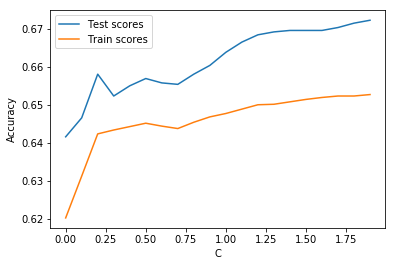

In [29]:
# visualize the data in learning curves 
plt.plot(c_list, scores_test, label='Test scores')
plt.plot(c_list, scores_train, label='Train scores')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()

### Submission

In [30]:
#  You'll have to predict_probas on "X_test_clean_v1", with whatever transformations/scalers you applied to the 
# the X_train data
# This is how to fix the problem with to small submission data!

In [31]:
# load data from csv
test = pd.read_csv('./X_test_clean_v1.csv')

In [32]:
test.shape

(116293, 101)

In [33]:
full_X = test[['Month_x', 'Year_x','Depart','Id','DayofYear','Cool','Tavg','Day_x','StnPressure','SeaLevel']]

In [34]:
# Scale
ss = StandardScaler()
ss.fit(full_X)
full_X_s = ss.transform(full_X)

In [35]:
proba_pair = logreg.predict_proba(full_X_s)
proba_pair

array([[9.99942969e-01, 5.70307706e-05],
       [9.99942973e-01, 5.70266734e-05],
       [9.99942977e-01, 5.70225766e-05],
       ...,
       [7.23759011e-01, 2.76240989e-01],
       [7.23773375e-01, 2.76226625e-01],
       [7.23787739e-01, 2.76212261e-01]])

In [36]:
probas = [item[1] for item in proba_pair]
probas

[5.703077057658586e-05,
 5.7026673436628415e-05,
 5.702257659099628e-05,
 5.7018480039668296e-05,
 5.701438378262333e-05,
 5.701028781984024e-05,
 5.7006192151297894e-05,
 5.700209677697516e-05,
 5.6998001696851e-05,
 5.699390691090398e-05,
 5.698981241911338e-05,
 5.698571822145776e-05,
 5.69816243179161e-05,
 5.697753070846727e-05,
 5.697343739309014e-05,
 5.696934437176361e-05,
 5.696525164446654e-05,
 5.6961159211177796e-05,
 5.695706707187629e-05,
 5.695297522654089e-05,
 5.694888367515049e-05,
 5.6944792417683956e-05,
 5.69407014541202e-05,
 5.693661078443809e-05,
 5.693252040861653e-05,
 5.692843032663442e-05,
 5.692434053847064e-05,
 5.692025104410408e-05,
 5.6916161843513765e-05,
 5.691207293667836e-05,
 5.690798432357677e-05,
 5.690389600418823e-05,
 5.68998079784913e-05,
 5.689572024646502e-05,
 5.689163280808828e-05,
 5.688754566333998e-05,
 5.6883458812199026e-05,
 5.687937225464435e-05,
 5.687528599065485e-05,
 5.687120002020945e-05,
 5.686711434328705e-05,
 5.68630289598

In [37]:
submission = pd.DataFrame(probas)
submission

,0
0,0.000057
1,0.000057
2,0.000057
3,0.000057
4,0.000057
5,0.000057
6,0.000057
7,0.000057
8,0.000057
9,0.000057


In [38]:
submission.index += 1
submission

,0
1,0.000057
2,0.000057
3,0.000057
4,0.000057
5,0.000057
6,0.000057
7,0.000057
8,0.000057
9,0.000057
10,0.000057


In [39]:
submission.shape

(116293, 1)

In [40]:
# write the data to a .csv
submission.to_csv('sub1.csv')

In [41]:
# Open the csv and manually change the column lables :)
# Id,WnvPresent

In [42]:
# scored 0.69856 at Kaggle

AUCROC

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
proba_pairs = logreg.predict_proba(X_test_s)
probas = [item[1] for item in proba_pairs]
roc_auc_score(y_test, probas)

0.7925497360941942

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

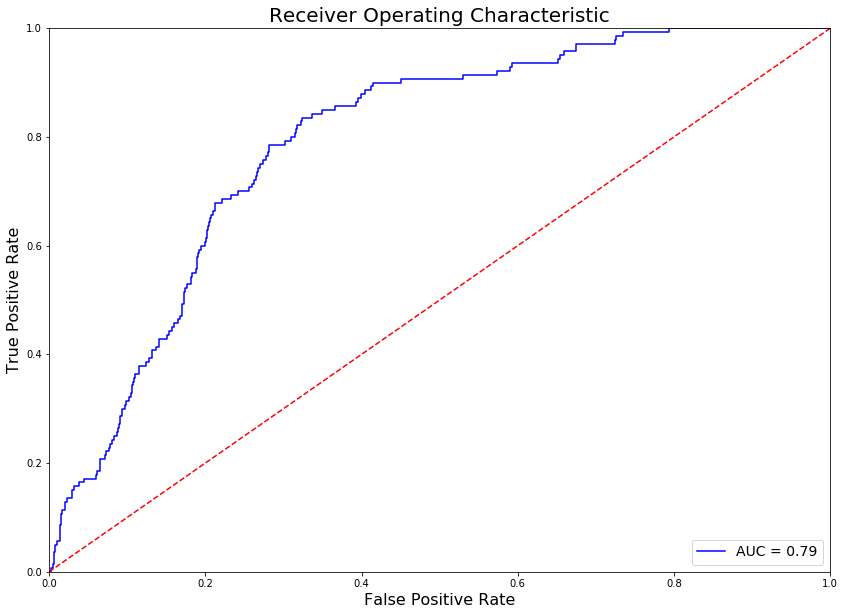

In [54]:
fpr, tpr, threshold = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

fix, ax = plt.subplots(figsize=(14,10))

plt.title('Receiver Operating Characteristic', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=14)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.show()